# Bitmap Graphics with Python
## Part 2: Morphological Operators and Convolution


* Read Chapter 5 of the "Bildverarbeitung" book (Nischwitz et al.)
* Only use methods from PIL/Pillow and implement all filters yourself.

In [3]:
from PIL import Image
from PIL.ImageOps import scale, posterize, grayscale, invert, pad, crop
from IPython.display import DisplayHandle

In [4]:
i_rgba = Image.open("example.png")
i_g = i_rgba.convert("L")
i_b = i_rgba.convert("1")

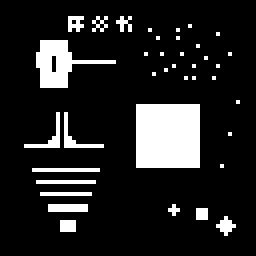

In [5]:
b_rgba = Image.open("bw_shapes.png")
b_g = b_rgba.convert("L")
b_b = b_rgba.convert("1")
scale(b_b, 4)

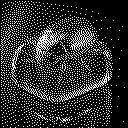

In [7]:
scale(i_b,1)

Hint: you can update a displayed image in-place by using ``IPython.display.DisplayHandle``

In [11]:
d = DisplayHandle()

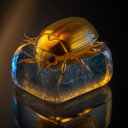

In [12]:
d.display(i_g)

In [13]:
d.update(i_rgba)

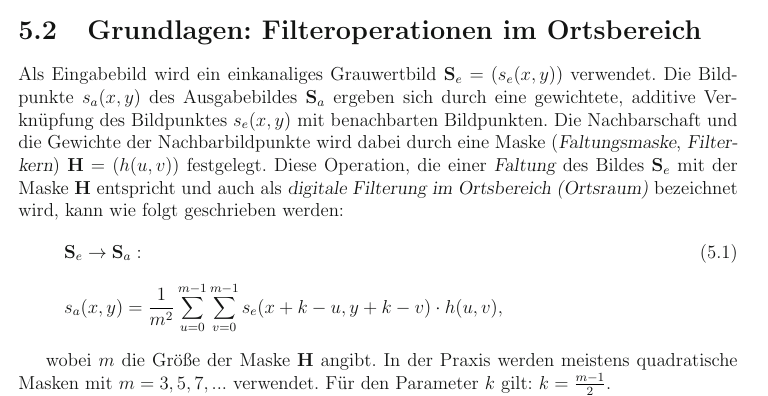

In [17]:
kernel1 = [0,1,0] # 1 in der Mitte: Identität

In [15]:
#               [1,1,1]
signal1 = [0,0,1,0,0,1,0,1,1,1,0,0]
#          0 1 1 1 1 1 2 2 3 2 1 0    / 3

In [16]:
def apply(kernel, signal):
    assert(len(kernel) == 3)
    ctr = (len(kernel) - 1) / 2 # 1
    out = [0]
    for idx in range(1, len(signal)-1):
        folded = signal[idx-1] * kernel[0] + signal[idx] * kernel[1] + signal[idx+1] * kernel[2]
        out.append(folded)
    out.append(0)
    return out

In [18]:
print(signal1)
print(apply(kernel1, signal1))

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]


In [19]:
kernel2 = [1,1,1]
print(signal1)
print(apply(kernel2, signal1))

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 2, 2, 3, 2, 1, 0]


In [21]:
kernel3 = [-1,0,1]
print(signal1)
print(apply(kernel3, signal1))

[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
[0, 1, 0, -1, 1, 0, 0, 1, 0, -1, -1, 0]


### 2D Convolution

In [22]:
k1 = [[-2, 0, 2],
      [-2, 0, 2],
      [-2, 0, 2]]

In [28]:
def apply2(kernel, image):
    w, h = image.size
    img_out = image.copy()
    # div = sum(kernel[0]) + sum(kernel[1]) + sum(kernel[2])
    div = 9
    for x in range(1, w-1):
        for y in range(1, h-1):
            new_val = 0
            for i in range(3):
                for j in range(3):
                    new_val += int(image.getpixel((x-1+i, y-1+j)) *
                                   kernel[i][j] / (div+0.01))
            img_out.putpixel((x,y), new_val)
    return img_out

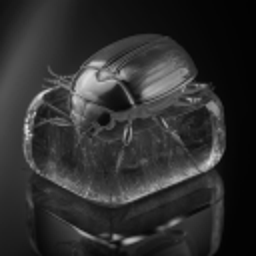

In [29]:
scale(i_g, 2)

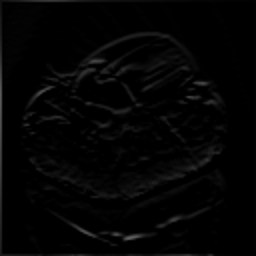

In [30]:
scale(apply2(k1, i_g), 2)

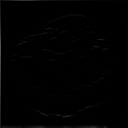

In [31]:
apply2(k1, apply2(k1, apply2(k1, i_g)))

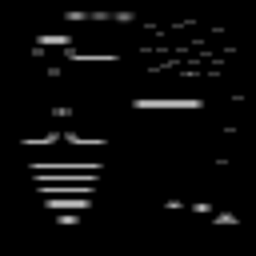

In [27]:
scale(apply2(k1, b_g),4)

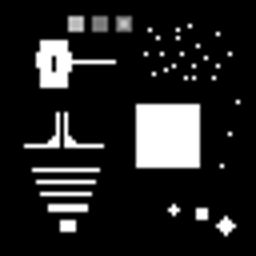

In [21]:
scale(b_g, 4)

### Next steps:

- find kernels for blur, edge detection, sharpen
- try out other custom kernels
- implement erode (minimum of surrounding pixels) and dilate (maximum of surrounding pixels) filters